In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')

In [69]:
accidents=pd.read_csv('UK_Acc.csv',low_memory=False)
vehicles=pd.read_csv('Veh.csv',low_memory=False)


In [70]:
# 1 Area graph of no. of accidents vs date
# 2 Which district has most no. of accidents
# 3 At what light conditions most accidents occur
# 4 At what weather conditions most accidents occur
# 5 Heatmap of No. of accidents occurred at particular weather and light conditions
# 6 Bar graph of no. of accidents vs day of week

# 7 Which Highway is worst and at which light conditions

In [71]:
accidents['Date']=accidents['Date'].str.cat(accidents['Time'],sep=' ')
accidents.rename(columns={'Date':'Date_And_Time'},inplace=True)


In [72]:
accidents.replace('-1',np.nan,inplace=True)
accidents.replace(-1,np.nan,inplace=True)

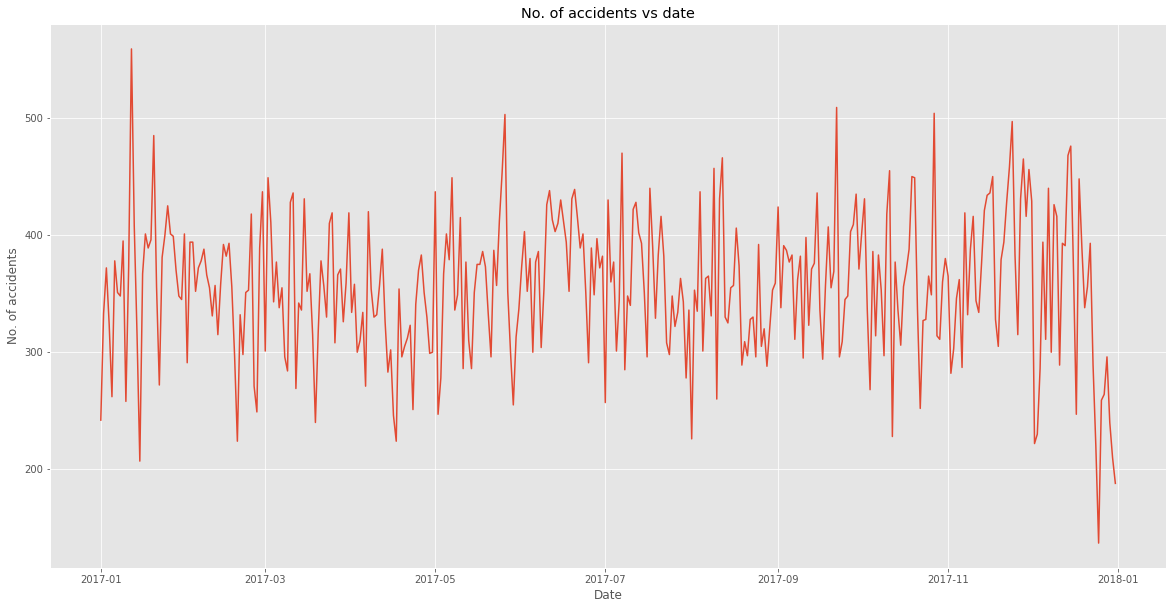

In [73]:
# 1
accidents['Date_And_Time']=pd.to_datetime(accidents['Date_And_Time'])
accidents['Date']=accidents['Date_And_Time'].dt.date
accidents.groupby('Date')['Date'].agg('count').plot(figsize=(20,10))
plt.title('No. of accidents vs date')
plt.ylabel('No. of accidents')
plt.show()

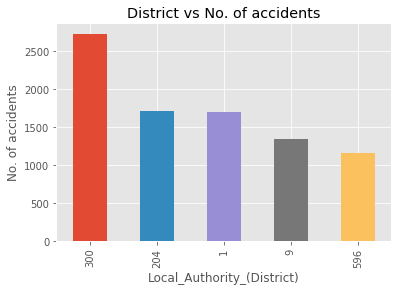

In [74]:
# 2
accidents.groupby('Local_Authority_(District)',axis=0)['Local_Authority_(District)'].agg('count').sort_values(ascending=False).head().plot(kind='bar')
plt.title('District vs No. of accidents')
plt.ylabel('No. of accidents')
plt.show()

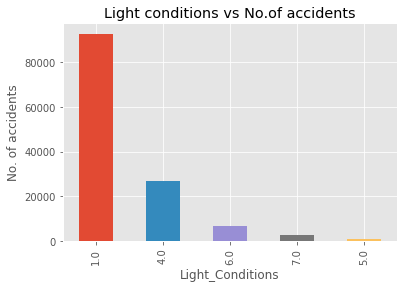

In [75]:
# 3
accidents.groupby('Light_Conditions',axis=0)['Light_Conditions'].agg('count').sort_values(ascending=False).head().plot(kind='bar')
plt.ylabel('No. of accidents')
plt.title("Light conditions vs No.of accidents")
plt.show()

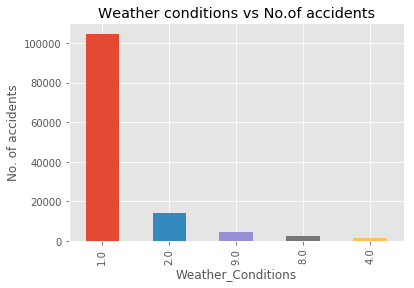

In [76]:
# 4
accidents.groupby('Weather_Conditions',axis=0)['Weather_Conditions'].agg('count').sort_values(ascending=False).head().plot(kind='bar')
plt.ylabel('No. of accidents')
plt.title("Weather conditions vs No.of accidents")
plt.show()

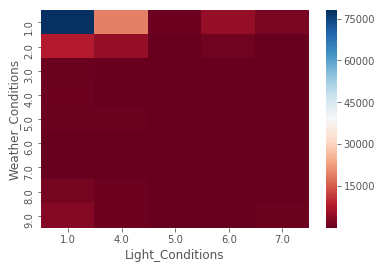

In [77]:
# 5  
pivot=accidents.pivot_table(index='Weather_Conditions',columns='Light_Conditions',values='1st_Road_Class',aggfunc='count')
sns.heatmap(pivot,cmap='RdBu')

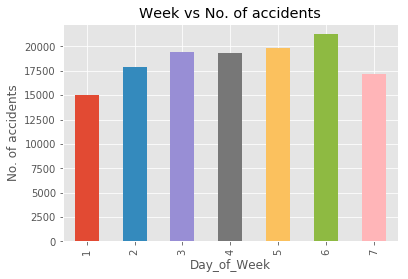

In [78]:
# 6
accidents.groupby('Day_of_Week')['Day_of_Week'].agg('count').plot(kind='bar')
plt.title('Week vs No. of accidents')
plt.ylabel('No. of accidents')
plt.show()

In [79]:
# 7 
accidents.groupby(['Local_Authority_(Highway)','Light_Conditions'])['Light_Conditions'].agg('count').sort_values(ascending=False).head(10)
#''' Highway E10000016 is the worst highway at light conditions 1'''

Local_Authority_(Highway)  Light_Conditions
E10000016                  1.0                 3034
E10000030                  1.0                 2661
E10000014                  1.0                 1925
E10000017                  1.0                 1919
E10000012                  1.0                 1900
E08000025                  1.0                 1860
E10000015                  1.0                 1609
E10000019                  1.0                 1424
E10000032                  1.0                 1405
E10000020                  1.0                 1316
Name: Light_Conditions, dtype: int64

# Analysis of Accident Vehicles 

In [80]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [81]:
#  Bar graph between Males and Females involved in  accidents by month


In [90]:
accidents['Month']=accidents['Date_And_Time'].dt.month
accidents.sort_values('Date',inplace=True)
left=accidents.xs(['Accident_Index','Month'],axis=1)
result=pd.merge(left,vehicles,how='left',on='Accident_Index')

In [98]:
result.replace('-1',np.nan,inplace=True)
result.replace(-1,np.nan,inplace=True)

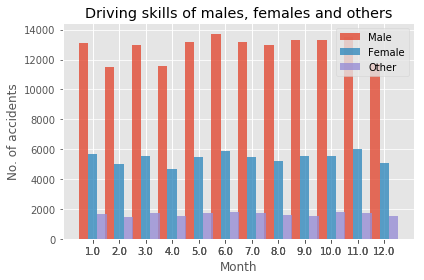

In [120]:
mft=result.groupby(['Month','Sex_of_Driver'],as_index=False)['Accident_Index'].agg('count')
male=mft[mft.Sex_of_Driver==1.0]
female=mft[mft.Sex_of_Driver==2.0]
tri=mft[mft.Sex_of_Driver==3.0]
bar_width=0.35
plt.bar(male.Month,male.Accident_Index,bar_width,alpha=.8,label='Male')
plt.bar(female.Month+bar_width,female.Accident_Index,bar_width,alpha=.8,label='Female')
plt.bar(tri.Month+bar_width*2,tri.Accident_Index,bar_width,alpha=.8,label='Other')
plt.xticks(mft.Month+bar_width,mft.Month)
plt.legend()
plt.title('Driving skills of males, females and others')
plt.xlabel('Month')
plt.ylabel('No. of accidents')
plt.tight_layout()
plt.show()
